In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.neural_network

In [188]:
Network_data = pd.read_csv("Train_data.csv")

In [22]:
Network_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [190]:
X = Network_data.iloc[:,0:40]

In [45]:
replacements = {'tcp': 1, 'udp': 2, 'icmp': 3}

In [184]:
unique_rows = X['service'].unique()
print(unique_rows)

[1 'other' 'private' 'remote_job' 'name' 'mtp' 0 'supdup' 'Z39_50'
 'csnet_ns' 'efs' 'klogin' 'link' 'hostnames' 'ntp_u' 'nntp' 'courier'
 'netstat' 'nnsp' 'IRC' 'tim_i' 'netbios_ssn' 'urh_i' 'http_8001']


In [192]:
#Encodes protocol type

X.loc[X['protocol_type'] == 'tcp', 'protocol_type'] = 1
X.loc[X['protocol_type'] == 'udp', 'protocol_type'] = 0
X.loc[X['protocol_type'] == 'icmp', 'protocol_type'] = -1

In [196]:
#Encodes Service

X.loc[X['service'].isin(['ssh', 'http_443', 'imap4', 'domain_u', 'domain', 'ldap', 'echo', 'printer', 'time', 'whois', 'efs', 'name']), 'service'] = 0
X.loc[X['service'].isin(['telnet', 'ftp', 'ftp_data', 'smtp', 'http', 'pop_2', 'pop_3', 'exec', 'login', 'shell', 'kshell', 'netbios_ns', 'netbios_dgm', 'iso_tsap', 'eco_i', 'ecr_i', 'urp_i', 'X11', 'sunrpc', 'uucp', 'uucp_path', 'sql_net', 'pm_dump', 'ctf', 'red_i', 'rje', 'discard', 'systat', 'gopher', 'finger', 'daytime', 'vmnet', 'auth', 'bgp', 'other', 'private', 'remote_job', 'mtp', 'supdup', 'Z39_50', 'csnet_ns', 'efs', 'klogin', 'link', 'hostnames', 'ntp_u', 'nntp', 'courier', 'netstat', 'nnsp', 'IRC', 'tim_i', 'net_bios_ssn', 'ruh_i', 'http_8001']), 'service'] = 1

In [198]:
#Encodes Flag

X.loc[X['flag'].isin(['SF', 'RSTO', 'RSTOS0', 'OTH']), 'flag'] = 0
X.loc[X['flag'].isin(['SH', 'S0', 'S2', 'REJ', 'S3', 'S1', 'RSTR']), 'flag'] = 1

In [200]:
Y = Network_data.iloc[:,41]

In [ ]:
for i in range(len(Y)):
    if Y[i] == 'anomaly':
        Y[i] = 1
    elif Y[i] == 'normal':
        Y[i] = 0

In [204]:
X_mix, X_test, Y_mix, Y_test = sklearn.model_selection.train_test_split(
    X_full, Y, test_size=0.2, shuffle=True, random_state=0,
)

X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(
    X_mix, Y_mix, test_size = 0.25, shuffle = True, random_state = 0,
)

In [206]:
X_train = X_train.astype(float)

In [208]:
Y_train = Y_train.astype(float)

In [210]:
perceptron = sklearn.linear_model.Perceptron(eta0 = 1)
perceptron.fit(X_train, Y_train)

Perceptron(eta0=1)

In [212]:
import sklearn.linear_model

eta = [1000000,100000,10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001]

accuracy = np.zeros(len(eta))

for i in range(len(eta)):
    perceptron = sklearn.linear_model.Perceptron(eta0=eta[i])
    perceptron.fit(X_train, Y_train)
    perceptron_model = perceptron.predict(X_validation)

    accuracy[i] = np.sum(Y_validation == perceptron_model)
    
print(eta[np.argmax(accuracy)])
print("Accuracy equals:", accuracy[np.argmax(accuracy)]/len(Y_validation)*100, "%")

1000000
Accuracy equals: 31.474498908513592 %


In [215]:
#linear regression model
lambds = np.exp(np.linspace(-20, 5, 50))

accuracy = np.zeros(len(lambds))

for i in range(len(lambds)):
    reg = sklearn.linear_model.Ridge(alpha = lambds[i])
    reg.fit(X_train,Y_train)
    regression_model = reg.predict(X_validation)

    accuracy[i] = np.sum(Y_validation == regression_model)

print(lambds[np.argmax(accuracy)])
print("Accuracy equals:", np.max(accuracy)/len(Y_validation)*100, "%")

C:\Users\Divesh Bansal\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.41043e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Divesh Bansal\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.34926e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Divesh Bansal\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.913e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Divesh Bansal\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=6.51761e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Divesh Bansal\anaconda3\Lib\site-pack

2.061153622438558e-09
Accuracy equals: 0.0 %


In [318]:
import sklearn.cluster
kmeans = sklearn.cluster.KMeans(n_clusters = 3)
kmeans.fit(X_train)
kernel_svm_model = kmeans.predict(X_validation)

accuracy = np.sum(Y_validation == kernel_svm_model)

accuracy/len(Y_validation)*100

53.0065489184362

In [321]:
cost = [1000000,100000,10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001]

accuracy = np.zeros(len(cost))

for i in range(len(cost)):
    svm = sklearn.svm.LinearSVC(C=cost[i])
    svm.fit(X_train, Y_train)
    linear_svm_model = svm.predict(X_validation)

    accuracy[i] = np.sum(Y_validation == linear_svm_model)

print(cost[np.argmax(accuracy)])
np.max(accuracy)/len(Y_validation)*100

C:\Users\Divesh Bansal\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Divesh Bansal\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Divesh Bansal\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Divesh Bansal\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Divesh Bansal\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'aut

0.001


C:\Users\Divesh Bansal\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


94.10597340742211

([<matplotlib.axis.YTick at 0x2657b29c3e0>,
 [Text(0, 0, '0.001'),
  Text(0, 3, '0.01'),
  Text(0, 6, '0.1'),
  Text(0, 9, '1.0'),
  Text(0, 12, '10.0'),
  Text(0, 15, '100.0'),
  Text(0, 18, '1000.0'),
  Text(0, 21, '10000.0'),
  Text(0, 24, '100000.0')])

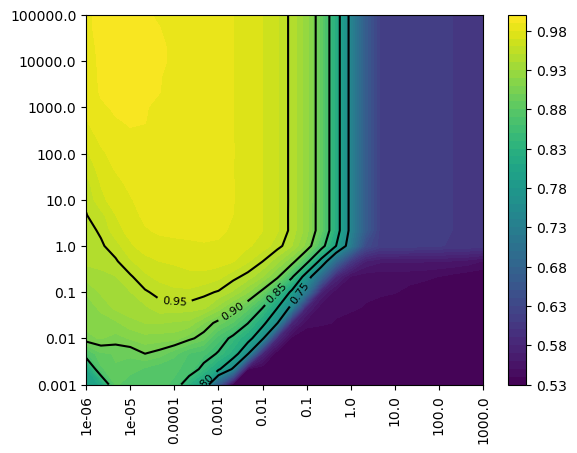

In [324]:
Cs = np.logspace(-3, 5, 25)
gammas = np.logspace(-6, 3, 28)

accuracy = np.zeros((len(Cs),len(gammas)))

for i in range(len(Cs)):
    for j in range(len(gammas)):
        svm = sklearn.svm.SVC(kernel='rbf', gamma=gammas[j], C=Cs[i])
        svm.fit(X_train, Y_train)
        svm_model = svm.predict(X_validation)
        
        accuracy[i,j] = (np.sum(Y_validation == svm_model)/len(Y_validation))

#print(cost[np.argmax(accuracy)])
#np.max(accuracy)/len(Y_validation)*100

XX, YY = np.meshgrid(np.arange(len(gammas)), np.arange(len(Cs)))
plt.contourf(XX, YY, accuracy, levels=50)
plt.colorbar()
CS = plt.contour(XX, YY, accuracy, levels=[0,0.75,0.8,0.85, 0.9, 0.95], colors='k')
plt.clabel(CS, CS.levels, inline=True, fontsize=8)
plt.xticks(np.arange(len(gammas))[::3], gammas[::3], rotation=90)
plt.yticks(np.arange(len(Cs))[::3], Cs[::3])